In [1]:
# Import Libraries
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# Load Data
csv_list = ['data/mean_sales.csv', 'data/home_values.csv', 'data/sales.csv', 'data/market_heat_index.csv']
#creating list of dfs from csvs
df_list = [pd.read_csv(data) for data in csv_list] 
#create df for each file (combine later)
zmean_sales_data, zhvi_data, zsales_data, zmhi_data = df_list

In [3]:
#summarize mean sales data
zmean_sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Columns: 889 entries, RegionID to 2025-01-04
dtypes: float64(884), int64(2), object(3)
memory usage: 1.0+ MB


In [4]:
zmean_sales_data.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2008-02-02,2008-02-09,2008-02-16,2008-02-23,2008-03-01,...,2024-11-02,2024-11-09,2024-11-16,2024-11-23,2024-11-30,2024-12-07,2024-12-14,2024-12-21,2024-12-28,2025-01-04
0,102001,0,United States,country,NaN,242520.0,238061.0,241567.0,231941.0,242231.0,...,490406.0,487547.0,490120.0,480477.0,466336.0,494170.0,479480.0,475459.0,464964.0,475268.0
1,394913,1,"New York, NY",msa,NY,515693.0,513959.0,531621.0,489292.0,478127.0,...,816554.0,792809.0,832223.0,791804.0,799304.0,798750.0,783696.0,794648.0,802263.0,780305.0
2,753899,2,"Los Angeles, CA",msa,CA,643683.0,684976.0,668933.0,669512.0,660234.0,...,1286783.0,1294163.0,1224034.0,1223551.0,1235895.0,1308884.0,1253488.0,1228749.0,1230238.0,1228981.0
3,394463,3,"Chicago, IL",msa,IL,294145.0,294681.0,286149.0,261971.0,267571.0,...,410608.0,387637.0,409731.0,396713.0,363261.0,408384.0,391429.0,401714.0,355250.0,386965.0
4,394514,4,"Dallas, TX",msa,TX,176861.0,180037.0,199360.0,181649.0,195115.0,...,487010.0,510358.0,512404.0,508901.0,469081.0,509330.0,513957.0,514308.0,462153.0,487853.0


In [5]:
#summarize home value index data
zhvi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 895 entries, 0 to 894
Columns: 306 entries, RegionID to 2025-01-31
dtypes: float64(301), int64(2), object(3)
memory usage: 2.1+ MB


In [6]:
zhvi_data.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31,2024-11-30,2024-12-31,2025-01-31
0,102001,0,United States,country,NaN,119926.267969,120130.844382,120384.672570,120929.808323,121557.288314,...,350214.020175,351698.162896,352339.229865,352551.024331,352834.209123,353318.979490,353958.097262,354528.402056,3.553211e+05,3.560025e+05
1,394913,1,"New York, NY",msa,NY,214960.607913,215869.168656,216782.852613,218630.807340,220534.713940,...,667700.587361,672608.818073,675802.038366,678424.245282,682039.489858,686150.349830,689931.991062,692764.755513,6.943543e+05,6.951709e+05
2,753899,2,"Los Angeles, CA",msa,CA,228161.991747,229032.737795,230166.267205,232425.338127,234877.031080,...,958133.750197,964711.889456,969167.113618,973877.213457,979435.328906,986267.307133,991948.412835,996909.029580,1.001390e+06,1.002067e+06
3,394463,3,"Chicago, IL",msa,IL,153598.367028,153747.494011,154022.113038,154705.228491,155521.579567,...,325022.246861,327299.589163,328624.592527,329422.219454,330370.763230,331491.953236,332637.326938,333923.838011,3.353661e+05,3.368000e+05
4,394514,4,"Dallas, TX",msa,TX,126263.096052,126318.940006,126387.849956,126562.596872,126787.641849,...,374472.502417,374624.863412,373968.338088,373040.710985,372401.858441,372222.388509,372136.524087,371874.304814,3.713634e+05,3.708453e+05


In [7]:
#summarize sales data
zsales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Columns: 209 entries, RegionID to 2025-01-31
dtypes: float64(204), int64(2), object(3)
memory usage: 153.6+ KB


In [8]:
zsales_data.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,...,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31,2024-11-30,2024-12-31,2025-01-31
0,102001,0,United States,country,NaN,202385.0,234142.0,259980.0,286501.0,299727.0,...,321473.0,354838.0,330319.0,346948.0,337155.0,290315.0,310196.0,267934.0,273375.0,209612.0
1,394913,1,"New York, NY",msa,NY,8583.0,9076.0,10098.0,10499.0,11400.0,...,11045.0,12367.0,12698.0,14363.0,14519.0,12159.0,12403.0,10533.0,11718.0,9469.0
2,753899,2,"Los Angeles, CA",msa,CA,4134.0,5039.0,6073.0,6873.0,7222.0,...,6719.0,7130.0,6393.0,7029.0,6804.0,5876.0,6652.0,5688.0,5911.0,4493.0
3,394463,3,"Chicago, IL",msa,IL,5579.0,6917.0,7233.0,7945.0,8783.0,...,9305.0,10222.0,9777.0,10269.0,9901.0,8261.0,8465.0,7604.0,7591.0,6101.0
4,394514,4,"Dallas, TX",msa,TX,4883.0,5537.0,5977.0,6658.0,6669.0,...,6991.0,7524.0,6504.0,6897.0,6489.0,5527.0,6032.0,5145.0,5385.0,4104.0


In [9]:
#summarize market heat index data -- buyers/sellers market
zmhi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 928 entries, 0 to 927
Data columns (total 90 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RegionID    928 non-null    int64  
 1   SizeRank    928 non-null    int64  
 2   RegionName  928 non-null    object 
 3   RegionType  928 non-null    object 
 4   StateName   927 non-null    object 
 5   2018-01-31  878 non-null    float64
 6   2018-02-28  861 non-null    float64
 7   2018-03-31  857 non-null    float64
 8   2018-04-30  866 non-null    float64
 9   2018-05-31  871 non-null    float64
 10  2018-06-30  880 non-null    float64
 11  2018-07-31  879 non-null    float64
 12  2018-08-31  873 non-null    float64
 13  2018-09-30  873 non-null    float64
 14  2018-10-31  866 non-null    float64
 15  2018-11-30  885 non-null    float64
 16  2018-12-31  878 non-null    float64
 17  2019-01-31  881 non-null    float64
 18  2019-02-28  887 non-null    float64
 19  2019-03-31  891 non-null    f

In [10]:
zmhi_data.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,...,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31,2024-11-30,2024-12-31,2025-01-31
0,102001,0,United States,country,NaN,49.0,50.0,52.0,54.0,55.0,...,62.0,59.0,57.0,55.0,53.0,52.0,50.0,50.0,51.0,52.0
1,394913,1,"New York, NY",msa,NY,52.0,52.0,55.0,56.0,55.0,...,87.0,81.0,77.0,76.0,76.0,73.0,69.0,69.0,77.0,85.0
2,753899,2,"Los Angeles, CA",msa,CA,69.0,66.0,66.0,67.0,67.0,...,80.0,74.0,71.0,68.0,66.0,63.0,62.0,63.0,66.0,69.0
3,394463,3,"Chicago, IL",msa,IL,48.0,49.0,51.0,52.0,50.0,...,75.0,71.0,67.0,64.0,61.0,58.0,56.0,55.0,59.0,63.0
4,394514,4,"Dallas, TX",msa,TX,56.0,56.0,58.0,60.0,60.0,...,65.0,60.0,56.0,52.0,50.0,49.0,49.0,49.0,51.0,54.0


In [11]:
#consolidate columns/rows
def remove_column(df, col):
    """removes column from df"""
    return df.drop(col, axis=1)
def remove_row(df, row):
    """removes row from df"""
    return df.drop(row, axis=0)
list_of_dfs = [zmhi_data, zsales_data, zhvi_data, zmean_sales_data]

In [12]:
#remove RegionType -- no value
zmhi_data = remove_column(zmhi_data, 'RegionType')
zsales_data = remove_column(zsales_data, 'RegionType')
zhvi_data = remove_column(zhvi_data, 'RegionType')
zmean_sales_data = remove_column(zmean_sales_data, 'RegionType')

In [13]:
#analyze missing data
def missing(df):
    missing = pd.concat([df.isnull().sum(axis=1), 100 * df.isnull().mean(axis=1)], axis=1)
    missing.columns=['count', '%']
    return missing.sort_values(by='count', ascending=False)

In [14]:
missing(zmean_sales_data)

,count,%
136,883,99.436937
149,883,99.436937
152,879,98.986486
118,871,98.085586
134,834,93.918919
...,...,...
75,0,0.000000
76,0,0.000000
78,0,0.000000
79,0,0.000000


In [15]:
missing(zhvi_data)

,count,%
630,232,76.065574
849,194,63.606557
388,193,63.278689
873,193,63.278689
747,193,63.278689
...,...,...
18,0,0.000000
47,0,0.000000
48,0,0.000000
49,0,0.000000


In [16]:
missing(zsales_data)

,count,%
5,4,1.923077
66,2,0.961538
93,1,0.480769
0,1,0.480769
1,1,0.480769
...,...,...
89,0,0.000000
90,0,0.000000
91,0,0.000000
92,0,0.000000


In [17]:
missing(zmhi_data)

,count,%
797,68,76.404494
863,64,71.910112
724,64,71.910112
835,63,70.786517
527,63,70.786517
...,...,...
3,0,0.000000
2,0,0.000000
925,0,0.000000
1,0,0.000000


In [18]:
missing_zhvi = missing(zhvi_data)

In [19]:
#multiple missing 63.28% of data, check if patterns for null values
missing_zhvi['%'].value_counts()

%
0.000000     303
35.409836     53
1.311475      43
47.213115     42
36.065574     42
            ... 
51.803279      1
59.672131      1
39.016393      1
38.360656      1
60.000000      1
Name: count, Length: 130, dtype: int64

In [20]:
#filter out 0%
missing_zhvi['%'].value_counts()[missing_zhvi['%'].value_counts() < 300].head(15)

%
35.409836    53
1.311475     43
47.213115    42
36.065574    42
35.737705    37
0.327869     36
63.278689    32
0.655738     24
0.983607     23
36.393443    15
36.721311    10
37.377049     6
3.934426      6
37.049180     6
8.852459      5
Name: count, dtype: int64

In [21]:
#look into high percentages of missing values for mean sales data & market heat index data
missing_mean = missing(zmean_sales_data)

In [22]:
missing_mean['%'].value_counts()

%
0.000000     78
0.112613     26
0.225225     16
0.450450      4
0.337838      4
63.175676     2
99.436937     2
93.918919     2
98.085586     1
87.837838     1
98.986486     1
56.756757     1
58.558559     1
76.801802     1
79.954955     1
93.018018     1
23.648649     1
16.328829     1
23.536036     1
6.081081      1
6.306306      1
6.418919      1
12.049550     1
12.162162     1
0.788288      1
5.855856      1
3.603604      1
Name: count, dtype: int64

In [23]:
missing_mhi = missing(zmhi_data)

In [24]:
missing_mhi['%'].value_counts()

%
0.000000     712
1.123596      62
3.370787      27
2.247191      26
5.617978      12
4.494382      12
43.820225     11
6.741573       9
8.988764       6
12.359551      5
19.101124      4
13.483146      3
14.606742      3
15.730337      3
47.191011      3
23.595506      3
44.943820      3
71.910112      2
70.786517      2
7.865169       2
11.235955      2
22.471910      2
10.112360      2
76.404494      1
35.955056      1
20.224719      1
50.561798      1
64.044944      1
69.662921      1
28.089888      1
24.719101      1
51.685393      1
57.303371      1
48.314607      1
16.853933      1
Name: count, dtype: int64

In [25]:
#categorical data breakdown
#check for duplicate cities
zmean_sales_data['RegionName'].value_counts().head()

RegionName
Santa Fe, NM        1
Fort Collins, CO    1
Rockford, IL        1
Columbus, GA        1
South Bend, IN      1
Name: count, dtype: int64

In [26]:
zsales_data['RegionName'].value_counts().head()

RegionName
Fort Collins, CO    1
United States       1
New York, NY        1
Los Angeles, CA     1
Chicago, IL         1
Name: count, dtype: int64

In [27]:
zmhi_data['RegionName'].value_counts().head()

RegionName
Guymon, OK     1
Borger, TX     1
Pierre, SD     1
Huron, SD      1
Carroll, IA    1
Name: count, dtype: int64

In [28]:
zhvi_data['RegionName'].value_counts().head()

RegionName
Lamesa, TX         1
United States      1
New York, NY       1
Los Angeles, CA    1
Chicago, IL        1
Name: count, dtype: int64

In [29]:
#breakdown by Region/State
zmean_sales_data['StateName'].value_counts()

StateName
CA    14
FL    14
TX     9
NC     9
PA     8
OH     8
NY     6
AL     5
TN     5
CO     4
SC     4
MA     4
GA     4
LA     4
MI     4
IL     3
VA     3
OR     3
IN     3
MO     3
AZ     3
CT     3
NV     2
WA     2
MD     2
MS     2
KY     2
WI     2
OK     2
UT     2
NM     2
AR     2
MN     1
RI     1
HI     1
NE     1
ID     1
IA     1
KS     1
ME     1
DE     1
Name: count, dtype: int64

In [30]:
zsales_data['StateName'].value_counts()

StateName
CA    10
FL     8
TX     6
NY     5
NC     5
OH     5
SC     3
PA     3
VA     3
MA     3
CO     3
TN     3
UT     3
CT     3
WI     2
MO     2
OK     2
LA     2
MI     2
AZ     2
IL     1
MN     1
IN     1
NV     1
MD     1
OR     1
WA     1
GA     1
KY     1
RI     1
AL     1
HI     1
NE     1
NM     1
ID     1
AR     1
IA     1
KS     1
Name: count, dtype: int64

In [31]:
zmhi_data['StateName'].value_counts()

StateName
TX    71
OH    46
IN    38
GA    37
NC    37
PA    35
CA    34
MI    31
FL    29
NY    27
IL    27
TN    27
AL    25
MO    25
MN    23
WI    23
IA    22
OK    21
AR    21
MS    21
KY    21
OR    20
WA    20
KS    19
NM    19
LA    19
CO    17
SC    16
VA    14
ID    13
NE    12
SD    11
AZ    11
NV     9
WY     9
UT     9
WV     8
MT     7
ND     7
MA     6
MD     6
NH     6
CT     5
HI     4
AK     4
ME     4
VT     4
NJ     4
DE     2
RI     1
Name: count, dtype: int64

In [32]:
zhvi_data['StateName'].value_counts()

StateName
TX    67
OH    44
NC    37
GA    37
IN    36
CA    34
PA    34
MI    31
FL    29
NY    26
IL    26
TN    26
MO    25
WI    23
MN    21
OK    21
WA    20
OR    20
MS    20
KY    20
AL    20
AR    20
IA    19
KS    18
NM    18
CO    17
LA    17
SC    15
VA    14
ID    13
NE    12
SD    11
AZ    10
NV     9
WY     9
UT     9
MT     7
WV     7
ND     7
MA     6
MD     6
CT     5
NH     5
HI     4
AK     4
ME     4
VT     4
NJ     4
DE     2
RI     1
Name: count, dtype: int64

In [33]:
#creating melt function to melt data frames to prep to combine
def melted(df):
    return df.melt(id_vars=['RegionID', 'SizeRank', 'RegionName', 'StateName'], var_name='date')

In [34]:
zhvi_melt = melted(zhvi_data)
zhvi_melt.dtypes

RegionID        int64
SizeRank        int64
RegionName     object
StateName      object
date           object
value         float64
dtype: object

In [35]:
#function to convert date columns to month & year columns
def month_year(df):
    df['date'] = pd.to_datetime(df['date'])
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    return df.drop('date', axis=1)

In [36]:
#convert month/year columns for home value
zhvi_melt = month_year(zhvi_melt)

In [37]:
zhvi_melt.head()

,RegionID,SizeRank,RegionName,StateName,value,month,year
0,102001,0,United States,NaN,119926.267969,1,2000
1,394913,1,"New York, NY",NY,214960.607913,1,2000
2,753899,2,"Los Angeles, CA",CA,228161.991747,1,2000
3,394463,3,"Chicago, IL",IL,153598.367028,1,2000
4,394514,4,"Dallas, TX",TX,126263.096052,1,2000


In [38]:
#rename value column to refelct df value
zhvi_melt = zhvi_melt.rename(columns={'value': 'home_value'})
zhvi_melt.head()

,RegionID,SizeRank,RegionName,StateName,home_value,month,year
0,102001,0,United States,NaN,119926.267969,1,2000
1,394913,1,"New York, NY",NY,214960.607913,1,2000
2,753899,2,"Los Angeles, CA",CA,228161.991747,1,2000
3,394463,3,"Chicago, IL",IL,153598.367028,1,2000
4,394514,4,"Dallas, TX",TX,126263.096052,1,2000


In [39]:
zmhi_melt = melted(zmhi_data)
zmhi_melt.head()

,RegionID,SizeRank,RegionName,StateName,date,value
0,102001,0,United States,NaN,2018-01-31,49.0
1,394913,1,"New York, NY",NY,2018-01-31,52.0
2,753899,2,"Los Angeles, CA",CA,2018-01-31,69.0
3,394463,3,"Chicago, IL",IL,2018-01-31,48.0
4,394514,4,"Dallas, TX",TX,2018-01-31,56.0


In [40]:
zmhi_melt = month_year(zmhi_melt)
zmhi_melt.head()

,RegionID,SizeRank,RegionName,StateName,value,month,year
0,102001,0,United States,NaN,49.0,1,2018
1,394913,1,"New York, NY",NY,52.0,1,2018
2,753899,2,"Los Angeles, CA",CA,69.0,1,2018
3,394463,3,"Chicago, IL",IL,48.0,1,2018
4,394514,4,"Dallas, TX",TX,56.0,1,2018


In [41]:
zmhi_melt = zmhi_melt.rename(columns={'value': 'market_heat_index'})
zmhi_melt.head()

,RegionID,SizeRank,RegionName,StateName,market_heat_index,month,year
0,102001,0,United States,NaN,49.0,1,2018
1,394913,1,"New York, NY",NY,52.0,1,2018
2,753899,2,"Los Angeles, CA",CA,69.0,1,2018
3,394463,3,"Chicago, IL",IL,48.0,1,2018
4,394514,4,"Dallas, TX",TX,56.0,1,2018


In [42]:
zsales_melt = melted(zsales_data)
zsales_melt = month_year(zsales_melt)
zsales_melt = zsales_melt.rename(columns={'value': 'number_of_sales'})
zsales_melt.head()

,RegionID,SizeRank,RegionName,StateName,number_of_sales,month,year
0,102001,0,United States,NaN,202385.0,2,2008
1,394913,1,"New York, NY",NY,8583.0,2,2008
2,753899,2,"Los Angeles, CA",CA,4134.0,2,2008
3,394463,3,"Chicago, IL",IL,5579.0,2,2008
4,394514,4,"Dallas, TX",TX,4883.0,2,2008


In [43]:
#change mean_sales data from weekly to monthly
zmean_sales_data.head()

,RegionID,SizeRank,RegionName,StateName,2008-02-02,2008-02-09,2008-02-16,2008-02-23,2008-03-01,2008-03-08,...,2024-11-02,2024-11-09,2024-11-16,2024-11-23,2024-11-30,2024-12-07,2024-12-14,2024-12-21,2024-12-28,2025-01-04
0,102001,0,United States,NaN,242520.0,238061.0,241567.0,231941.0,242231.0,244458.0,...,490406.0,487547.0,490120.0,480477.0,466336.0,494170.0,479480.0,475459.0,464964.0,475268.0
1,394913,1,"New York, NY",NY,515693.0,513959.0,531621.0,489292.0,478127.0,484858.0,...,816554.0,792809.0,832223.0,791804.0,799304.0,798750.0,783696.0,794648.0,802263.0,780305.0
2,753899,2,"Los Angeles, CA",CA,643683.0,684976.0,668933.0,669512.0,660234.0,666820.0,...,1286783.0,1294163.0,1224034.0,1223551.0,1235895.0,1308884.0,1253488.0,1228749.0,1230238.0,1228981.0
3,394463,3,"Chicago, IL",IL,294145.0,294681.0,286149.0,261971.0,267571.0,263308.0,...,410608.0,387637.0,409731.0,396713.0,363261.0,408384.0,391429.0,401714.0,355250.0,386965.0
4,394514,4,"Dallas, TX",TX,176861.0,180037.0,199360.0,181649.0,195115.0,196418.0,...,487010.0,510358.0,512404.0,508901.0,469081.0,509330.0,513957.0,514308.0,462153.0,487853.0


In [44]:
#melt df
zmean_sales_melt = melted(zmean_sales_data)
zmean_sales_melt.head()

,RegionID,SizeRank,RegionName,StateName,date,value
0,102001,0,United States,NaN,2008-02-02,242520.0
1,394913,1,"New York, NY",NY,2008-02-02,515693.0
2,753899,2,"Los Angeles, CA",CA,2008-02-02,643683.0
3,394463,3,"Chicago, IL",IL,2008-02-02,294145.0
4,394514,4,"Dallas, TX",TX,2008-02-02,176861.0


In [45]:
#check dtypes
zmean_sales_melt.dtypes

RegionID        int64
SizeRank        int64
RegionName     object
StateName      object
date           object
value         float64
dtype: object

In [46]:
#convert to datetime
zmean_sales_melt['date'] = pd.to_datetime(zmean_sales_melt['date'])
zmean_sales_melt.dtypes

RegionID               int64
SizeRank               int64
RegionName            object
StateName             object
date          datetime64[ns]
value                float64
dtype: object

In [47]:
#convert to monthly format then group and take mean 
zmean_sales_melt['date'] = zmean_sales_melt['date'].dt.strftime('%Y-%m') 
zmean_sales_melt = zmean_sales_melt.groupby(['RegionID', 'SizeRank', 'RegionName', 'StateName', 'date'])['value'].mean().reset_index()

In [48]:
zmean_sales_melt.head()

,RegionID,SizeRank,RegionName,StateName,date,value
0,394304,83,"Akron, OH",OH,2008-02,111182.75
1,394304,83,"Akron, OH",OH,2008-03,117496.40
2,394304,83,"Akron, OH",OH,2008-04,116325.50
3,394304,83,"Akron, OH",OH,2008-05,140846.00
4,394304,83,"Akron, OH",OH,2008-06,137244.50


In [49]:
zmean_sales_melt = month_year(zmean_sales_melt)
zmean_sales_melt = zmean_sales_melt.rename(columns={'value': 'mean_sales_price'})
zmean_sales_melt.head()

,RegionID,SizeRank,RegionName,StateName,mean_sales_price,month,year
0,394304,83,"Akron, OH",OH,111182.75,2,2008
1,394304,83,"Akron, OH",OH,117496.40,3,2008
2,394304,83,"Akron, OH",OH,116325.50,4,2008
3,394304,83,"Akron, OH",OH,140846.00,5,2008
4,394304,83,"Akron, OH",OH,137244.50,6,2008


In [50]:
#join dfs
joined_df = pd.merge(
    left=zhvi_melt, 
    right=zmhi_melt, 
    how='outer', 
    left_on=['RegionID', 'SizeRank', 'RegionName', 'StateName', 'month', 'year'], 
    right_on=['RegionID', 'SizeRank', 'RegionName', 'StateName', 'month', 'year'])

In [51]:
joined_df

,RegionID,SizeRank,RegionName,StateName,home_value,month,year,market_heat_index
0,102001,0,United States,NaN,119926.267969,1,2000,NaN
1,102001,0,United States,NaN,127659.812176,1,2001,NaN
2,102001,0,United States,NaN,136318.263829,1,2002,NaN
3,102001,0,United States,NaN,145856.183280,1,2003,NaN
4,102001,0,United States,NaN,157175.664356,1,2004,NaN
...,...,...,...,...,...,...,...,...
272195,845172,769,"Winfield, KS",KS,NaN,12,2020,54.0
272196,845172,769,"Winfield, KS",KS,NaN,12,2021,41.0
272197,845172,769,"Winfield, KS",KS,NaN,12,2022,38.0
272198,845172,769,"Winfield, KS",KS,NaN,12,2023,37.0


In [52]:
joined_df2 = pd.merge(
    left=zsales_melt, 
    right=zmean_sales_melt, 
    how='outer', 
    left_on=['RegionID', 'SizeRank', 'RegionName', 'StateName', 'month', 'year'], 
    right_on=['RegionID', 'SizeRank', 'RegionName', 'StateName', 'month', 'year'])

In [53]:
joined_df2

,RegionID,SizeRank,RegionName,StateName,number_of_sales,month,year,mean_sales_price
0,102001,0,United States,NaN,164043.0,1,2009,NaN
1,102001,0,United States,NaN,181355.0,1,2010,NaN
2,102001,0,United States,NaN,190729.0,1,2011,NaN
3,102001,0,United States,NaN,208041.0,1,2012,NaN
4,102001,0,United States,NaN,243406.0,1,2013,NaN
...,...,...,...,...,...,...,...,...
31615,845160,198,"Prescott Valley, AZ",AZ,NaN,12,2020,489783.00
31616,845160,198,"Prescott Valley, AZ",AZ,NaN,12,2021,555898.75
31617,845160,198,"Prescott Valley, AZ",AZ,NaN,12,2022,552262.60
31618,845160,198,"Prescott Valley, AZ",AZ,NaN,12,2023,606485.00


In [54]:
#final cleaned df
df = pd.merge(
    left=joined_df, 
    right=joined_df2, 
    how='outer', 
    left_on=['RegionID', 'SizeRank', 'RegionName', 'StateName', 'month', 'year'], 
    right_on=['RegionID', 'SizeRank', 'RegionName', 'StateName', 'month', 'year'])

In [55]:
df.head()

,RegionID,SizeRank,RegionName,StateName,home_value,month,year,market_heat_index,number_of_sales,mean_sales_price
0,102001,0,United States,NaN,119926.267969,1,2000,NaN,NaN,NaN
1,102001,0,United States,NaN,127659.812176,1,2001,NaN,NaN,NaN
2,102001,0,United States,NaN,136318.263829,1,2002,NaN,NaN,NaN
3,102001,0,United States,NaN,145856.183280,1,2003,NaN,NaN,NaN
4,102001,0,United States,NaN,157175.664356,1,2004,NaN,NaN,NaN


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272557 entries, 0 to 272556
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   RegionID           272557 non-null  int64  
 1   SizeRank           272557 non-null  int64  
 2   RegionName         272557 non-null  object 
 3   StateName          272256 non-null  object 
 4   home_value         220135 non-null  float64
 5   month              272557 non-null  int32  
 6   year               272557 non-null  int32  
 7   market_heat_index  76668 non-null   float64
 8   number_of_sales    19166 non-null   float64
 9   mean_sales_price   28412 non-null   float64
dtypes: float64(4), int32(2), int64(2), object(2)
memory usage: 18.7+ MB


In [57]:
#check missing values
df.isnull().sum()

RegionID                  0
SizeRank                  0
RegionName                0
StateName               301
home_value            52422
month                     0
year                      0
market_heat_index    195889
number_of_sales      253391
mean_sales_price     244145
dtype: int64

In [58]:
df.loc[df['RegionName'] == 'United States']

,RegionID,SizeRank,RegionName,StateName,home_value,month,year,market_heat_index,number_of_sales,mean_sales_price
0,102001,0,United States,NaN,119926.267969,1,2000,NaN,NaN,NaN
1,102001,0,United States,NaN,127659.812176,1,2001,NaN,NaN,NaN
2,102001,0,United States,NaN,136318.263829,1,2002,NaN,NaN,NaN
3,102001,0,United States,NaN,145856.183280,1,2003,NaN,NaN,NaN
4,102001,0,United States,NaN,157175.664356,1,2004,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
296,102001,0,United States,NaN,263905.952589,12,2020,72.0,466661.0,NaN
297,102001,0,United States,NaN,305888.020755,12,2021,77.0,462739.0,NaN
298,102001,0,United States,NaN,336336.021876,12,2022,56.0,274350.0,NaN
299,102001,0,United States,NaN,345520.769213,12,2023,56.0,248390.0,NaN


In [130]:
#remove US data
df = df[df['RegionID'] != 102001]

In [60]:
df.head()

,RegionID,SizeRank,RegionName,StateName,home_value,month,year,market_heat_index,number_of_sales,mean_sales_price
301,394297,677,"Aberdeen, SD",SD,NaN,1,2000,NaN,NaN,NaN
302,394297,677,"Aberdeen, SD",SD,NaN,1,2001,NaN,NaN,NaN
303,394297,677,"Aberdeen, SD",SD,NaN,1,2002,NaN,NaN,NaN
304,394297,677,"Aberdeen, SD",SD,NaN,1,2003,NaN,NaN,NaN
305,394297,677,"Aberdeen, SD",SD,NaN,1,2004,NaN,NaN,NaN


In [61]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RegionID,272256.0,416896.754319,88125.322797,394297.000000,394550.000000,394801.000000,395054.000000,8.451720e+05
SizeRank,272256.0,464.027368,269.115743,1.000000,231.000000,463.000000,694.000000,9.390000e+02
home_value,219834.0,178943.036101,124914.140969,34313.175563,105837.734144,143408.582573,206746.278877,1.744104e+06
month,272256.0,6.481334,3.461009,1.000000,3.000000,6.000000,9.000000,1.200000e+01
year,272256.0,2012.136603,7.256637,2000.000000,2006.000000,2012.000000,2018.000000,2.025000e+03
market_heat_index,76583.0,53.385334,23.059863,-100.000000,41.000000,52.000000,66.000000,4.290000e+02
number_of_sales,18962.0,2454.786679,2643.520590,39.000000,822.000000,1422.000000,3017.000000,2.398300e+04
mean_sales_price,28412.0,293810.430985,201636.219319,67682.000000,171207.312500,231573.250000,336814.200000,2.100472e+06


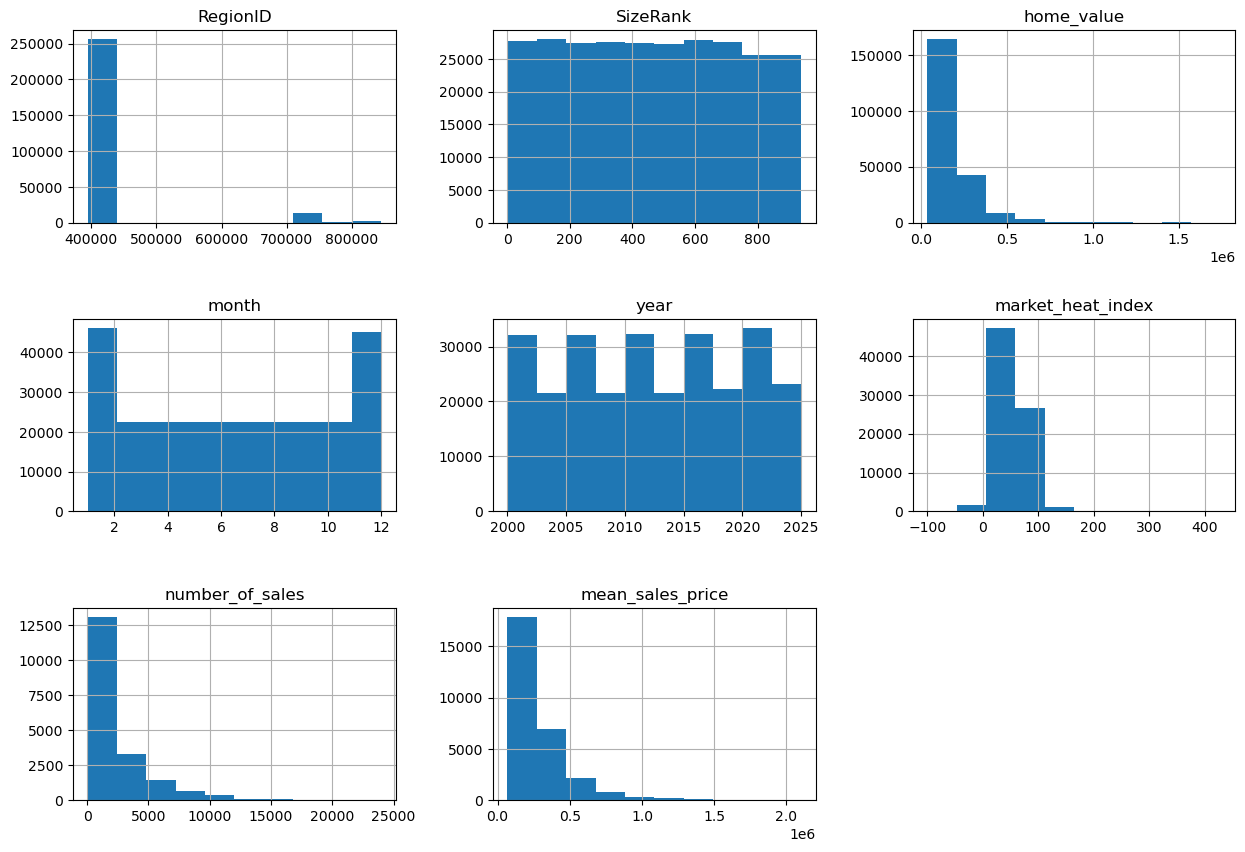

In [62]:
df.hist(figsize=(15, 10))
plt.subplots_adjust(hspace=0.5)

In [63]:
#price and value means
price_value_means = df.groupby('StateName')[['home_value', 'mean_sales_price']].mean()
price_value_means.head()

,home_value,mean_sales_price
StateName,,
AK,299060.367372,NaN
AL,135946.992534,236739.478183
AR,108879.728007,226756.941544
AZ,203975.776493,307432.162908
CA,384187.153698,545930.933975


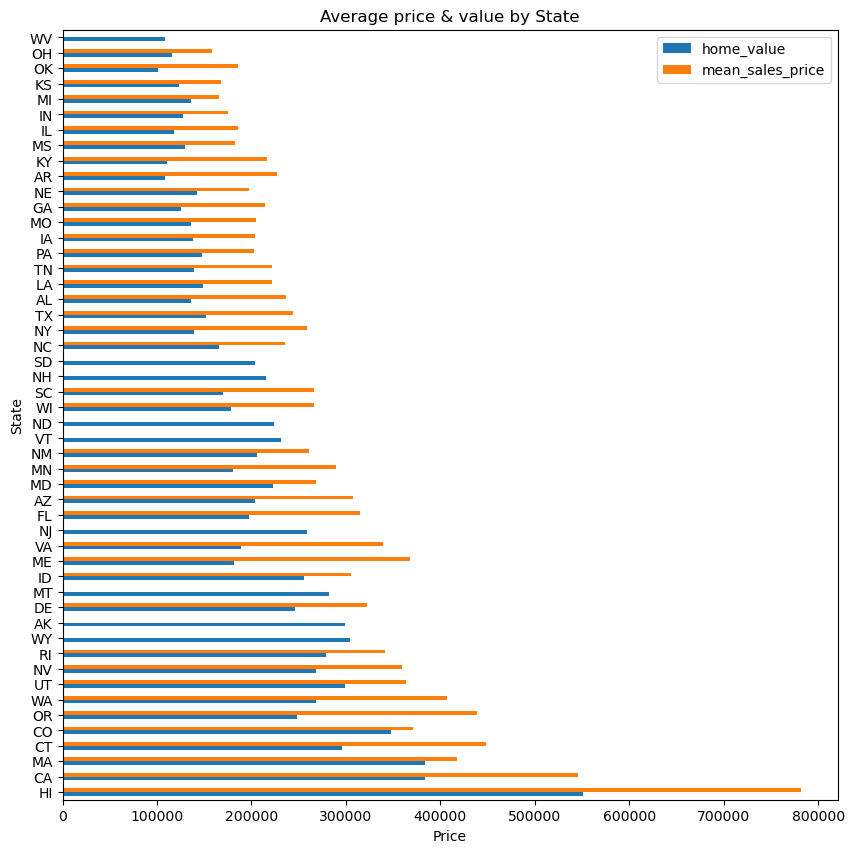

In [64]:
#graph by state
(price_value_means.reindex(index=price_value_means.mean(axis=1)
    .sort_values(ascending=False)
    .index)
    .plot(kind='barh', figsize=(10, 10), title='Average price & value by State'))
plt.xlabel('Price')
plt.ylabel('State');